In [1]:
import cellmap
import anndata
import scanpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [3]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

In [4]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: spliced, unspliced.
computing neighbors


2023-04-18 10:04:11.205449: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 10:04:12.085487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 10:04:14.965582: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 10:04:14.983195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 10:04:26.640634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

    finished (0:00:51) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:33) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


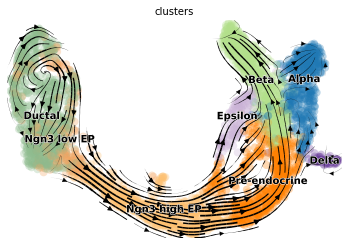

In [5]:
scv.pl.velocity_embedding_stream(adata)

In [6]:
%%time
import cellmap
cellmap.Hodge_decomposition(adata)

{'Contribution_ratio': {'Potential': '20.50%', 'Rotation': '79.50%'}}
CPU times: user 3min 4s, sys: 5min 58s, total: 9min 2s
Wall time: 2min 24s


In [11]:
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'potential', 'vorticity_umap', 'stream_line_umap', 'potential_vorticity_umap', 'potential_stream_line_umap', 'rotation_vorticity_umap', 'rotation_stream_line_umap', 'rotation'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'CellMap_log', 'CellMap_graph'
    obsm: 'X_pca', 'X_umap', 'velocity_umap', 'potential_velocity_umap', 'rotation_velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

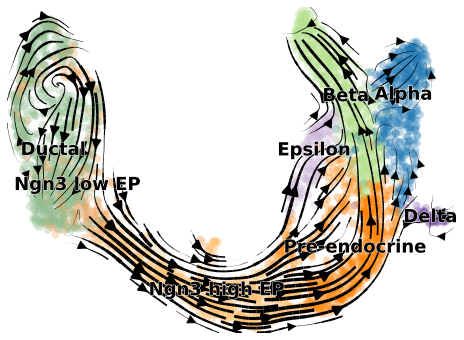

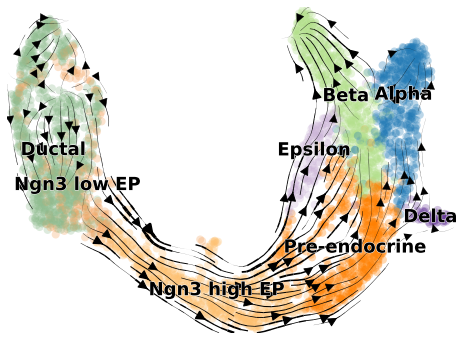

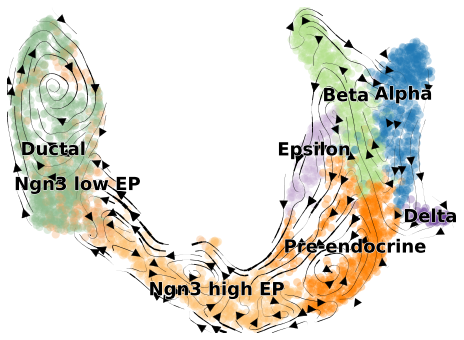

In [8]:
basis='umap'
vkey = 'velocity'
cluster_key = 'clusters'
density = 2
kwargs = {}
potential_vkey = 'potential_velocity'
rotation_vkey = 'rotation_velocity'
alpha = 0.3
legend_fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(8,6))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=legend_fontsize, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
fig.savefig('materials/Fig_endo_1_RNA_velocity.png', bbox_inches='tight',dpi=200)
fig,ax = plt.subplots(1,1,figsize=(8,6))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=potential_vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=legend_fontsize, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
fig.savefig('materials/Fig_endo_2_Potential_flow.png', bbox_inches='tight',dpi=200)
fig,ax = plt.subplots(1,1,figsize=(8,6))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=rotation_vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=legend_fontsize, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
fig.savefig('materials/Fig_endo_3_Rotational_flow.png', bbox_inches='tight',dpi=200)

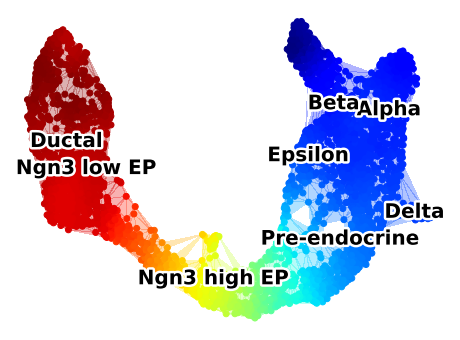

In [9]:
from matplotlib import patheffects as PathEffects
basis = 'umap'
potential_key = 'potential'
graph_key = 'CM_graph'
cluster_key = 'clusters'
show_graph = True
cutedge_vol  = None
cutedge_length = None
title = ''
save = False
filename = 'CellMap_view'
show_graph = True
alpha = 0.3
legend_fontsize = 18
kwargs = {'cmap':'jet'}

basis_key = 'X_%s' % basis
data_pos = adata.obsm[basis_key]
fig,ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(data_pos[:,0],data_pos[:,1],c=adata.obs[potential_key],zorder=10,cmap='jet')
if show_graph:
    tri_ = cellmap.create_graph(data_pos[:,0],data_pos[:,1],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length)
    ax.tripcolor(tri_,adata.obs[potential_key],lw=0.5,zorder=0,alpha=0.3,cmap='jet')
if cluster_key != None:
    if cluster_key in adata.obs.keys():
        cluster = adata.obs[cluster_key]
        for c in np.unique(cluster):
            txt = plt.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=20,ha='center', va='center',fontweight='bold',zorder=20)
            txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    else:
        print('There is no cluster key \"%s\" in adata.obs' % cluster_key)
ax.axis('off')
ax.set_title(title,fontsize=18)
# plt.colorbar(sc,aspect=20, pad=0.01, orientation='vertical')
fig.savefig('materials/Fig_endo_4_Potential.png', bbox_inches='tight',dpi=200)

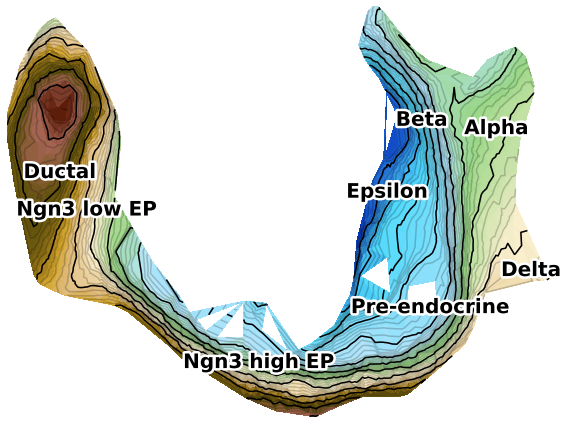

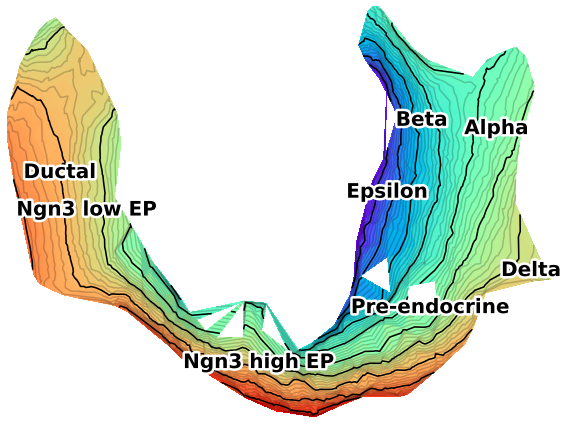

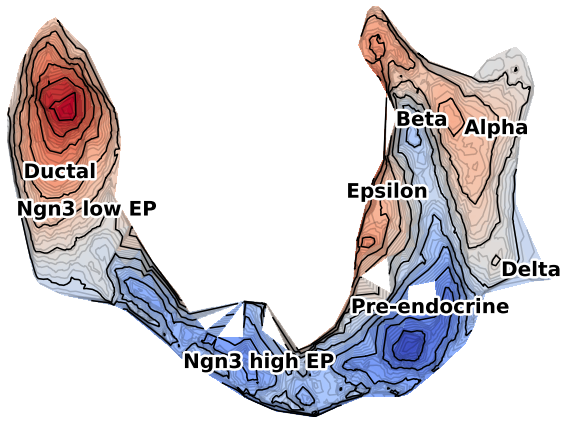

In [10]:
adata,
basis = 'umap'
contour_key = 'stream_line'
graph_key = 'CM_graph'
cluster_key = 'clusters'
potential_key = 'potential'
rotation_key = 'rotation'
cutedge_vol  = None
cutedge_length = None
title = ''
save = False
filename = 'CellMap_stream_line'
figsize = (8,6)
fontsize = 18
cbar = False

basis_key = 'X_%s' % basis

key_ = '%s_%s' % (contour_key,basis)
pot_key_ = '%s_%s_%s' % (potential_key,contour_key,basis)
rot_key_ = '%s_%s_%s' % (rotation_key,contour_key,basis)


data_pos = adata.obsm[basis_key]
tri_ = cellmap.create_graph(data_pos[:,0],data_pos[:,1],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length)

contour_keys = [key_, pot_key_, rot_key_]
camps = [cellmap.cmap_earth(adata.obs[key_]),'rainbow','coolwarm']
titles = ['RNA velocity','Potential flow','Rotational flow']
filenames = ['Fig_endo_5_RNA_velocity_SL','Fig_endo_6_Potential_flow_SL','Fig_endo_7_Rotational_flow_SL']

for i in range(3):
    fig,ax = plt.subplots(1,1,figsize=figsize,tight_layout=True)
    ax.axis('off')
    ax.set_title(title,fontsize=18)
    sc = ax.tripcolor(tri_,adata.obs[contour_keys[i]],cmap=camps[i])
    ax.tricontour(tri_,adata.obs[contour_keys[i]],lw=0.2,alpha=0.2,levels=75,zorder=3,colors='k',cmap=None,ls='-')
    ax.tricontour(tri_,adata.obs[contour_keys[i]],lw=1,alpha=1,levels=15,zorder=3,colors='k',cmap=None,ls='-')
    if cbar: plt.colorbar(sc,aspect=20, pad=0.01, orientation='vertical').set_label(contour_key,fontsize=20)
    # ax.set_title(titles[i],fontsize=fontsize)
    if cluster_key != None:
        if cluster_key in adata.obs.keys():
            cluster = adata.obs[cluster_key]
            for c in np.unique(cluster):
                txt = ax.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=20,ha='center', va='center',fontweight='bold',zorder=20)
                txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    else:
        print('There is no cluster key \"%s\" in adata.obs' % cluster_key)

    # if save: fig.savefig(filename+'.png', bbox_inches='tight')
    fig.savefig('materials/'+filenames[i]+'.png', bbox_inches='tight',dpi=200)

In [12]:
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.io as pio

potential_key = 'potential'
cluster_key ='clusters'
cutedge_vol  = None
cutedge_length = None
show_cells = False
show_shadow = True
shadow_alpha = 0.2
title = 'Landscape'
bgcolor = "white"
gridcolor = "gray"
edges_color='lightgray'
seed = None
n_points = 500
save = False
filename = 'CellMap_view_3D'
kwargs = {}
kwargs['cmap'] = cellmap.cmap_earth(adata.obs[potential_key])

x,y,z = adata.obsm[basis_key][:,0], adata.obsm[basis_key][:,1],adata.obs[potential_key]

c_list  = ['#0938BF','#50D9FB','#B7E5FA','#98D685','#F9EFCD','#E0BB7D','#D3A62D','#997618','#705B10','#5F510D','#A56453','#5C1D09']
c_level = [0,5,20,40,60,75,80,85,90,95,99,100]
custom_cmap = [[0.01*c_level[i],c_list[i]] for i in range(len(c_list))]

tri_,idx_tri = cellmap.create_graph(x,y,cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_mask = True)
triangles = tri_.triangles[idx_tri]

camera = dict(eye=dict(x=1.2, y=-1.2, z=1.0))
idx = np.zeros(adata.shape[0],dtype=bool)
np.random.seed(seed)
idx[np.random.choice(adata.shape[0],min(n_points,adata.shape[0]),replace=False)] = True
shift = 0.01*(max(z)-min(z))
shadow = go.Mesh3d(
    x=x,
    y=y,
    z=np.zeros(adata.shape[0]),
    i=triangles[:, 0],
    j=triangles[:, 1],
    k=triangles[:, 2],
    opacity=shadow_alpha,
    color='black',
)

if cluster_key in adata.obs.keys():
    clstr = adata.obs[cluster_key]
    clstr_set = np.unique(clstr)
    clstr_id = np.empty(adata.shape[0],dtype=int)
    text = np.array([clstr[i]+'<br>Potential: '+str(np.round(z[i],decimals=2)) for i in range(adata.shape[0])])
    for i in range(len(clstr_set)):
        clstr_id[clstr == clstr_set[i]] = i
    cmap = plt.get_cmap('tab10')
    norm = plt.Normalize(vmin=0,vmax=10)
    color_mapped = cmap(norm(clstr_id[idx]))
    cells = go.Scatter3d(
        x=x[idx],
        y=y[idx],
        z=z[idx]+shift,
        mode='markers',
        marker=dict(
            size=2.5,
            color=color_mapped,
            opacity=1
        ),
        text=text[idx],
        hovertemplate='X: %{x:.2f}<br>Y: %{y:.2f}<br>Z: %{z:.2f}<br>%{text}'
    )

    surf = go.Mesh3d(
        x=x,
        y=y,
        z=z,
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        intensity=z,
        colorscale=custom_cmap,
        text=text,
        opacity=1,
        hovertemplate='X: %{x:.2f}<br>Y: %{y:.2f}<br>Z: %{z:.2f}<br>%{text}'
    )

    annotations = [dict(
        showarrow=False,
        x=np.percentile(x[clstr == np.unique(clstr)[i]],50),
        y=np.percentile(y[clstr == np.unique(clstr)[i]],50),
        z=np.percentile(z[clstr == np.unique(clstr)[i]],50),
        text="<b>%s<b>" % str(np.unique(clstr)[i]),
        font=dict(size=14,color='rgba(0,0,0,1)'),bgcolor="rgba(255,255,255,0.7)") for i in range(len(np.unique(clstr)))]
    layout = go.Layout(
        title = title,
        width=1500,
        height=1000,
        # margin=dict(l=0,r=0, b=0,t=50),
        scene_camera=camera,
        scene=dict(annotations=annotations,xaxis_title=basis+"_1",yaxis_title=basis+"_2",zaxis_title=potential_key,
                 xaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 yaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 zaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
        ),
        meta=dict(),
        scene_aspectratio=dict(x=1.0, y=1.0, z=0.5),
    )
    data = [surf]
    if show_cells: data.append(cells)
    if show_shadow: data.append(shadow)
    fig = go.Figure(data=data, layout=layout)
    #                  )
else:
    cells = go.Scatter3d(
        x=x[idx],
        y=y[idx],
        z=z[idx]+shift,
        mode='markers',
        marker=dict(
            size=2,
            color='gray',
        ),
    )
    surf = go.Mesh3d(
        x=x,
        y=y,
        z=z,
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        intensity=z,
        colorscale=custom_cmap,
        opacity=1
    )

    layout = go.Layout(
        title = title,
        width=1500,
        height=1000,
        # margin=dict(l=0,r=0, b=0,t=50),
        scene_camera=camera,
        scene=dict(xaxis_title=basis+"_1",yaxis_title=basis+"_2",zaxis_title=potential_key,
                 xaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 yaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 zaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
        ),
        meta=dict(),
        scene_aspectratio=dict(x=1.0, y=1.0, z=0.5),
    )
    data = [surf]
    if show_cells: data.append(cells)
    if show_shadow: data.append(shadow)
    fig = go.Figure(data=data, layout=layout)
fig.update_layout(coloraxis_showscale=False,margin=dict(l=0,r=0, b=0,t=50))
fig.show()

pio.write_image(fig, 'materials/Fig_endo_8_Potential3D.png')

/home/yusukeimoto/.local/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

